In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

In [2]:
startyear = 2018
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(750_000)
    else:
        demand.append(1_600_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
maize.handysize_perc = 0
maize.handymax_perc = 100
maize.panamax_perc = 0
maize.handling_fee = 9.8 # example Wijnand

wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

maize.scenario_data = pd.DataFrame(data=scenario_data)
maize.historic_data = []
wheat.scenario_data = pd.DataFrame(data=scenario_data)
wheat.historic_data = []
soybeans.scenario_data = pd.DataFrame(data=scenario_data)
soybeans.historic_data = []

demand = [maize, wheat, soybeans]

# plot scenarios 
if False:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax] 

# 1. Instatiate terminal system

In [5]:
Terminal = system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=defaults.mobile_crane_data, 
                         storage_type_defaults=defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2018
  Total vessel calls: 46
     Handysize calls: 11
     Handymax calls: 23
     Panamax calls: 12
  Total cargo volume: 2250000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.189772812336253
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.106701474661277
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.745677695436285
  *** add Berth to elements
     Berth occupancy (after adding

  Revenues (demand): 25280000.0
  Revenues (throughput): 6732936
a total of 1200 ton of quay_conveyor conveyor service capacity is online; 1200 ton total planned
add Conveyor to elements
add Conveyor to elements
add Conveyor to elements
a total of 1200 ton of conveyor service capacity is online; 2400 ton total planned
a total of 65000 ton of silo storage capacity is online; 65000 ton total planned
a total of 1200 ton of hinterland_conveyor conveyor service capacity is online; 1200 ton total planned
add Conveyor to elements
add Conveyor to elements
add Conveyor to elements
a total of 1200 ton of conveyor service capacity is online; 2400 ton total planned

Simulate year: 2024
  Total vessel calls: 96
     Handysize calls: 23
     Handymax calls: 48
     Panamax calls: 25
  Total cargo volume: 4800000
     a total of 5 Berth_01 is online; 5 total planned
     a total of 2 Quay_01 is online; 5 total planned
     a total of 6 Mobile_crane_01 is online; 13 total planned
     a total of 0 [] 

## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Maize

{'historic_data': [], 'scenario_data':    year   volume
0  2018   750000
1  2019   750000
2  2020   750000
3  2021   750000
4  2022   750000
5  2023  1600000
6  2024  1600000
7  2025  1600000
8  2026  1600000
9  2027  1600000, 'handling_fee': 9.8, 'handysize_perc': 0, 'handymax_perc': 100, 'panamax_perc': 0, 'name': 'Maize', 'id': 'b9acb7ba-4f4c-11e9-9782-60f677ba2ce0'}

Wheat

{'historic_data': [], 'scenario_data':    year   volume
0  2018   750000
1  2019   750000
2  2020   750000
3  2021   750000
4  2022   750000
5  2023  1600000
6  2024  1600000
7  2025  1600000
8  2026  1600000
9  2027  1600000, 'handling_fee': 3, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Wheat', 'id': 'b9acb7bb-4f4c-11e9-a2cb-60f677ba2ce0'}

Soybeans

{'historic_data': [], 'scenario_data':    year   volume
0  2018   750000
1  2019   750000
2  2020   750000
3  2021   750000
4  2022   750000
5  2023  1600000
6  2024  1600000
7  2025  1600000
8  2026  1600000
9  2027  1600000, 'h

9  2027        0.0     123000.0    12300.0  626924.0}

Hinterland_conveyor_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 123000.0, 'energy': 626924.0, 'insurance': 12300.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 1230000, 'type': 'hinterland_conveyor', 'length': 500, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 10, 'unit_rate': 6, 'mobilisation': 30000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'consumption_constant': 81, 'consumption_coefficient': 0.08, 'crew': 1, 'utilisation': 0.8, 'capacity_steps': 400, 'year_purchase': [], 'year_online': 2019, 'name': 'Hinterland_conveyor_01', 'id': 'b9e295c6-4f4c-11e9-934d-60f677ba2ce0', 'df':    year      capex  maintenance  insurance    energy
0  2018        0.0          0.0        0.0       0.0
1  2019  1230000.0          0.0        0.0       0.0
2  2020        0.0     123000.0    12300.0  626924.0
3  2021        0.0     123000.0    12300.0  626924.0
4  2022        0.0     123000.0 

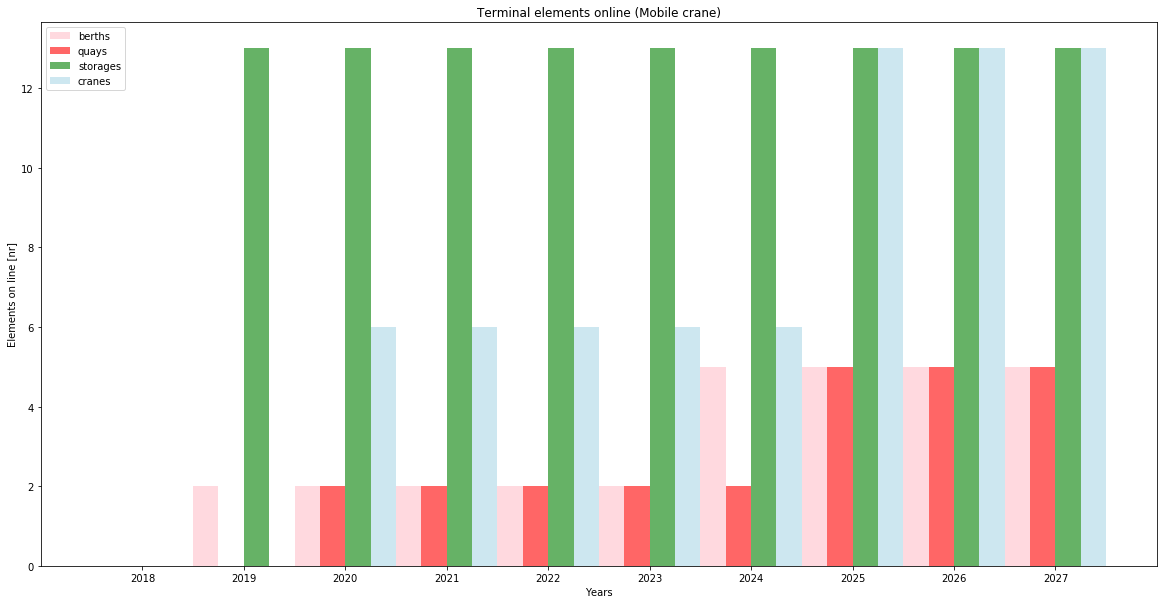

In [8]:
Terminal.terminal_elements_plot()

In [9]:
Terminal.terminal_capacity_plot()

NameError: name 'objects' is not defined

In [ ]:
Terminal.cashflow_plot()

## SandBox

In [ ]:
Terminal.NPV()